In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from federated_learning.helper import utils

In [2]:
users, data = utils.load_leaf_train("../../data/leaf_non_iid/data/femnist/data")

In [3]:
# _, target = utils.load_leaf_train("../../data/leaf_non_iid/data/femnist/data")

In [4]:
numbers = dict()
# numbers[num_samples] = num_users
for uu, dd in data.items():
    key = str(len(dd['y']))
    if key in numbers:
        numbers[key] += 1
    else:
        numbers[key] = 1
        
list_keys = list(data.keys())

print("Total Users:\t{}".format(len(list_keys)))
print("[{}]: Images: {}, Pixels: {}".format(
    list_keys[0], 
    len(data[list_keys[0]]['x']), 
    len(data[list_keys[0]]['x'][0])))

total_samples = 0
for uu in sorted(numbers.keys()):
#     print("{}:\t{}".format(uu, numbers[uu]))
    total_samples += int(uu) * int(numbers[uu])

print("Mean num of samples/user: {}".format(
    round(np.mean([int(ii) for ii in numbers])), 2))
print("Total Samples:\t{}".format(total_samples))

Total Users:	3463
[f0554_17]: Images: 354, Pixels: 784
Mean num of samples/user: 244.0
Total Samples:	701302


/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


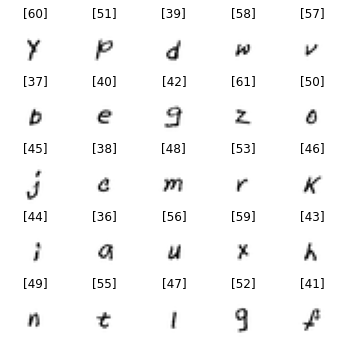

In [5]:
data_np = dict()
data_np['x'] = np.array(data[list_keys[0]]['x'], dtype = np.float32).reshape(-1, 28, 28)
data_np['y'] = np.array(data[list_keys[0]]['y'], dtype = np.int64).reshape(-1, 1)
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.title(data_np['y'][i])
    plt.imshow(data_np['x'][i], cmap='gray')

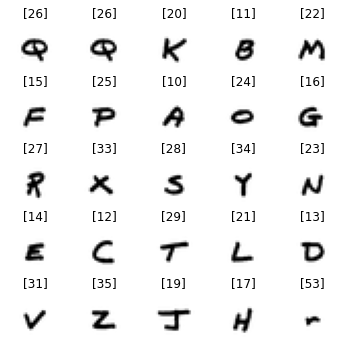

In [6]:
data_np = dict()
data_np['x'] = np.array(data[list_keys[1]]['x'], dtype = np.float32).reshape(-1, 28, 28)
data_np['y'] = np.array(data[list_keys[1]]['y'], dtype = np.int64).reshape(-1, 1)
figure = plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis("off")
    plt.title(data_np['y'][i])
    plt.imshow(data_np['x'][i], cmap='gray')

In [7]:
data_flatted_x = np.array([], dtype = np.float32).reshape(0, 28 * 28)
tmp_array = [np.array(data_['x'], dtype = np.float32) for data_ in data.values()]
for dd in tmp_array:
    data_flatted_x = np.concatenate((data_flatted_x, dd))
print(data_flatted_x.shape)

data_flatted_y = np.array([], dtype = np.float32)
tmp_array_y = [np.array(data_['y'], dtype = np.int64) for data_ in data.values()]
for dd in tmp_array_y:
    data_flatted_y = np.concatenate((data_flatted_y, dd))
    
print(data_flatted_x.shape)
print(data_flatted_y.shape)

(701302, 784)


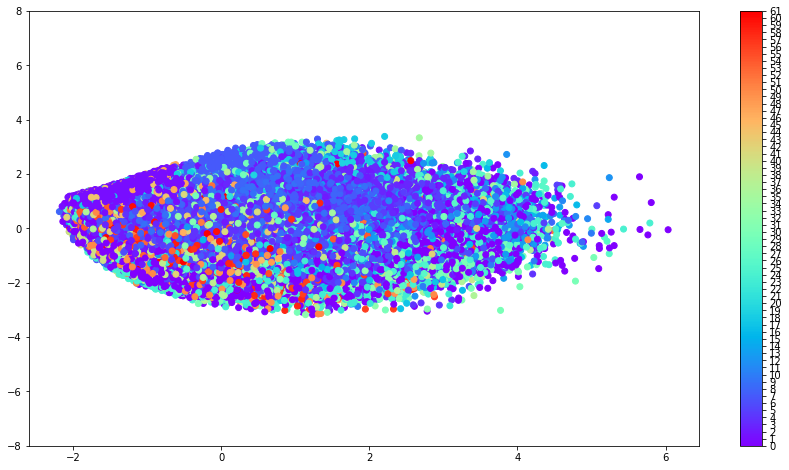

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

proj = pca.fit_transform(data_flatted_x)
figure = plt.figure(figsize=(15, 8))
plt.scatter(proj[:, 0], proj[:,1], c = data_flatted_y, cmap="rainbow")
plt.ylim([-8, 8])
plt.colorbar(ticks=range(len(np.unique(data_flatted_y))))